In [1]:
from PIL import Image
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
input_image_path = Path('../image-data/stereo_camera_test/')
input_image_dirs = ['stereo_camera_left', 'stereo_camera_right']

output_image_path_image = Path('../image-data/stereo_camera_test-gray/')
output_image_path_annot = Path('../image-data/stereo_camera_test-gray-annot/')

In [3]:
# Create grayscale images

for img_dir in input_image_dirs:
    imgs = (input_image_path / img_dir).glob('*.jpg')
    output_image_dir = output_image_path_image / img_dir
    output_image_dir.mkdir(parents=True, exist_ok=True)
    for img_fname in imgs:
        output_img_fname = output_image_dir / img_fname.name
        # img = Image.open(img_fname)
        # img.show()
        # img.convert('LA').show()
        Image.open(img_fname).convert('L').save(output_img_fname.with_suffix('.png'))

In [130]:
# Create image masks for semantic segmentation

for img_dir in input_image_dirs:
    imgs = (input_image_path / img_dir).glob('*.jpg')
    output_image_dir = output_image_path_annot / img_dir
    output_image_dir.mkdir(parents=True, exist_ok=True)
    for img_fname in imgs:
        output_img_fname = output_image_dir / img_fname.name

        img = Image.open(img_fname)
        img_np = np.array(img)
        
        thresh = 50
        
        img_np_r = img_np[:,:,0] > thresh
        img_np_g = img_np[:,:,1] > thresh
        img_np_b = img_np[:,:,2] > thresh

        img_np_red =     img_np_r  & (~img_np_g) & (~img_np_b)
        img_np_green = (~img_np_r) &   img_np_g  & (~img_np_b)
        img_np_blue =  (~img_np_r) & (~img_np_g) &   img_np_b
        
        mask_img = np.zeros(img_np_r.shape)
        
        mask_img[img_np_red] = 1
        mask_img[img_np_green] = 2
        mask_img[img_np_blue] = 3
        # All other pixels are 0 (background)
        
        Image.fromarray(mask_img).convert('L').save(output_img_fname.with_suffix('.png'))

In [87]:
# Test image (all cells below and including this one are just for
# looking at the image data and creating masks).
img = Image.open('/home/ajc/Documents/terrain-classification/image-data/stereo_camera_test/stereo_camera_left/default_left(1)-0000.jpg')
img_np = np.array(img)
img_np.shape

(400, 400, 3)

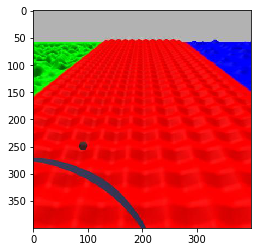

In [88]:
plt.imshow(img_np)

In [96]:
thresh = 50
img_np_r = img_np[:,:,0] > thresh
img_np_g = img_np[:,:,1] > thresh
img_np_b = img_np[:,:,2] > thresh

In [101]:
# img_np_red = np.logical_and.reduce([
#     img_np_r, 
#     np.logical_not(img_np_g),
#     np.logical_not(img_np_b)
# ])
img_np_red =     img_np_r  & (~img_np_g) & (~img_np_b)
img_np_green = (~img_np_r) &   img_np_g  & (~img_np_b)
img_np_blue =  (~img_np_r) & (~img_np_g) &   img_np_b

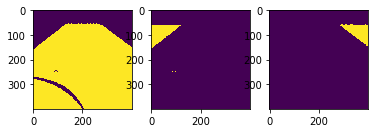

In [104]:
fig, (axr, axg, axb) = plt.subplots(1, 3)
axr.imshow(img_np_red)
axg.imshow(img_np_green)
axb.imshow(img_np_blue)

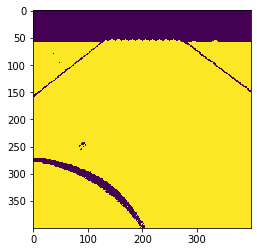

In [105]:
plt.imshow(img_np_red + img_np_green + img_np_blue)

In [109]:
mask_img = np.zeros(img_np_r.shape)
mask_img.shape

(400, 400)

In [114]:
# Background is 0
mask_img[img_np_red] = 1
mask_img[img_np_green] = 2
mask_img[img_np_blue] = 3

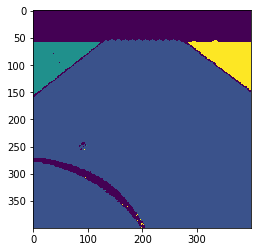

In [115]:
plt.imshow(mask_img)

In [116]:
Image.fromarray(mask_img).show()